In [7]:
import pandas as pd

# Load the original student-mat.csv (semicolon separated)
mat_data = pd.read_csv("student-mat.csv", delimiter=';')

# Load the preprocessed encoded data
encoded_data = pd.read_csv("student_data_encoded.csv")


In [9]:
# Check if number of rows match
print(len(mat_data), len(encoded_data))

# If they match, concatenate along columns
data = pd.concat([mat_data, encoded_data], axis=1)

# Display
data.head()



395 395


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,TotalAlc,AgeGroup,AbsenceCategory,StudytimeXFailures,LogAbsences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,6,5,6,6,2,18+,Medium,0,1.945910
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,4,5,5,6,2,16-17,Low,0,1.609438
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,10,7,8,10,5,14-15,Medium,6,2.397895
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,2,15,14,15,2,14-15,Low,0,1.098612
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,4,6,10,10,3,16-17,Low,0,1.609438


In [11]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 71 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             395 non-null    object 
 4   famsize             395 non-null    object 
 5   Pstatus             395 non-null    object 
 6   Medu                395 non-null    int64  
 7   Fedu                395 non-null    int64  
 8   Mjob                395 non-null    object 
 9   Fjob                395 non-null    object 
 10  reason              395 non-null    object 
 11  guardian            395 non-null    object 
 12  traveltime          395 non-null    int64  
 13  studytime           395 non-null    int64  
 14  failures            395 non-null    int64  
 15  schoolsup           395 non-null    object 
 16  famsup  

In [13]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Dalc,Walc,health,absences,G1,G2,G3,TotalAlc,StudytimeXFailures,LogAbsences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,...,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,3.772152,0.572152,1.370434
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,...,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,1.984389,1.316330,1.056935
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,2.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,3.000000,0.000000,1.609438
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,5.000000,0.000000,2.197225
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,10.000000,6.000000,4.330733


In [10]:
import numpy as np

def ensure_all_columns(input_df, required_columns, default_value=np.nan):
     for col in required_columns:
        if col not in input_df.columns:
            input_df[col] = default_value
     return input_df[required_columns]

In [11]:
required_columns = [
    'G2', 'famrel', 'Fedu', 'LogAbsences', 'internet', 'StudytimeXFailures', 'reason',
    'activities', 'school', 'Medu', 'Mjob', 'traveltime', 'famsup', 'AbsenceCategory',
    'Pstatus', 'AgeGroup', 'romantic', 'Fjob', 'G1', 'nursery', 'freetime',
    'guardian', 'schoolsup', 'famsize', 'higher', 'Dalc', 'paid', 'Walc', 'TotalAlc'
]
input_df = ensure_all_columns(input_df, required_columns)
input_processed = preprocessor.transform(input_df)


NameError: name 'input_df' is not defined

In [6]:

import numpy as np

def ensure_all_columns(input_df, required_columns, default_value=np.nan):
     for col in required_columns:
        if col not in input_df.columns:
            input_df[col] = default_value
     return input_df[required_columns]

# Univariate analysis/ Distributions/ Histograms

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
numerical_cols = data.select_dtypes(include=['int64']).columns

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

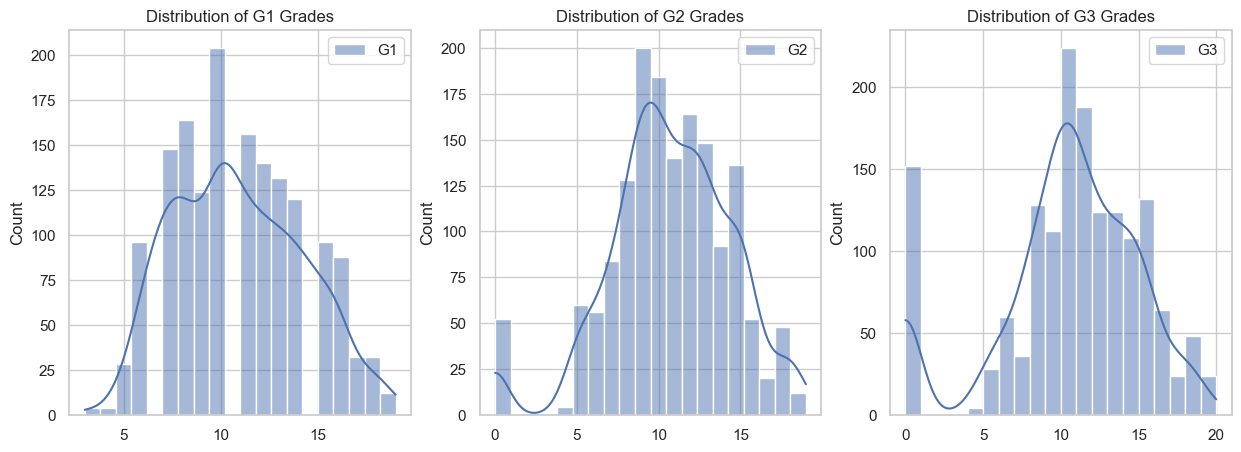

In [ ]:
mat_data = pd.read_csv("student-mat.csv", delimiter=';')
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histograms for the distribution of grades (G1, G2, G3)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['G1'], kde=True, bins=20, color='blue')
plt.title('Distribution of G1 Grades')

plt.subplot(1, 3, 2)
sns.histplot(data['G2'], kde=True, bins=20, color='green')
plt.title('Distribution of G2 Grades')

plt.subplot(1, 3, 3)
sns.histplot(data['G3'], kde=True, bins=20, color='red')
plt.title('Distribution of G3 Grades')

plt.show()

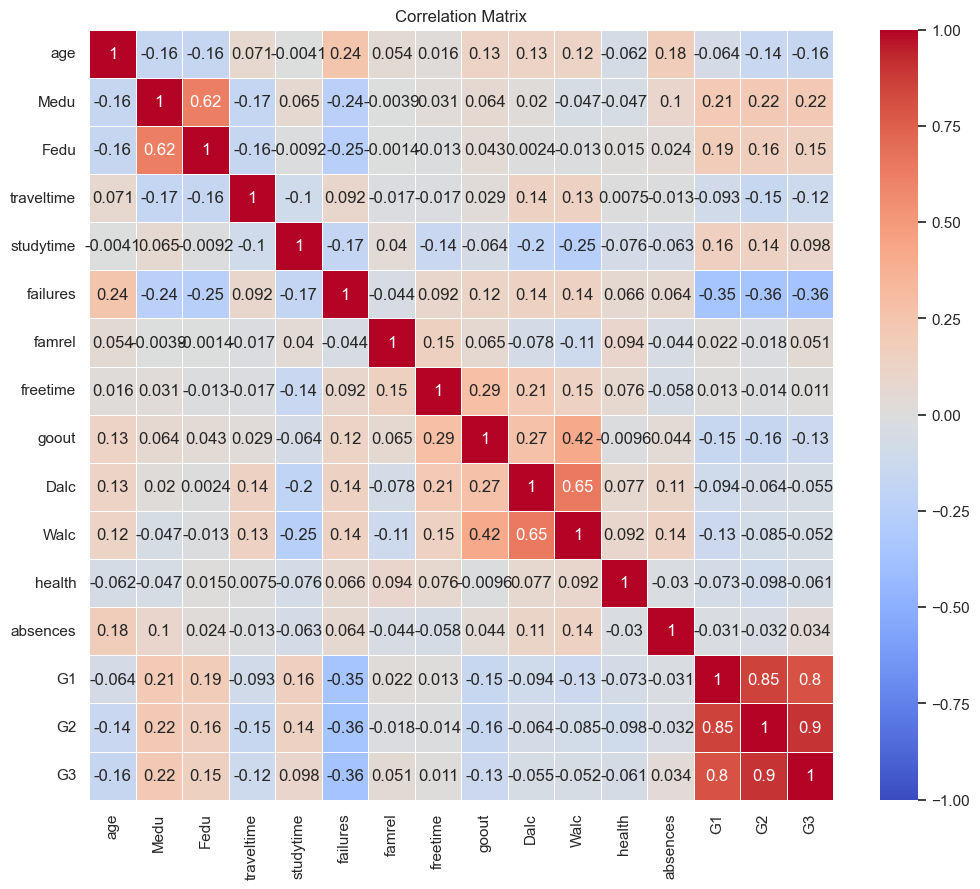

In [ ]:
data = pd.read_csv("student-mat.csv", delimiter=';')
numeric_data=data.select_dtypes(include=["number"])
corr_mat=numeric_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',vmin=-1,vmax=1,linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

# Categorical Variables

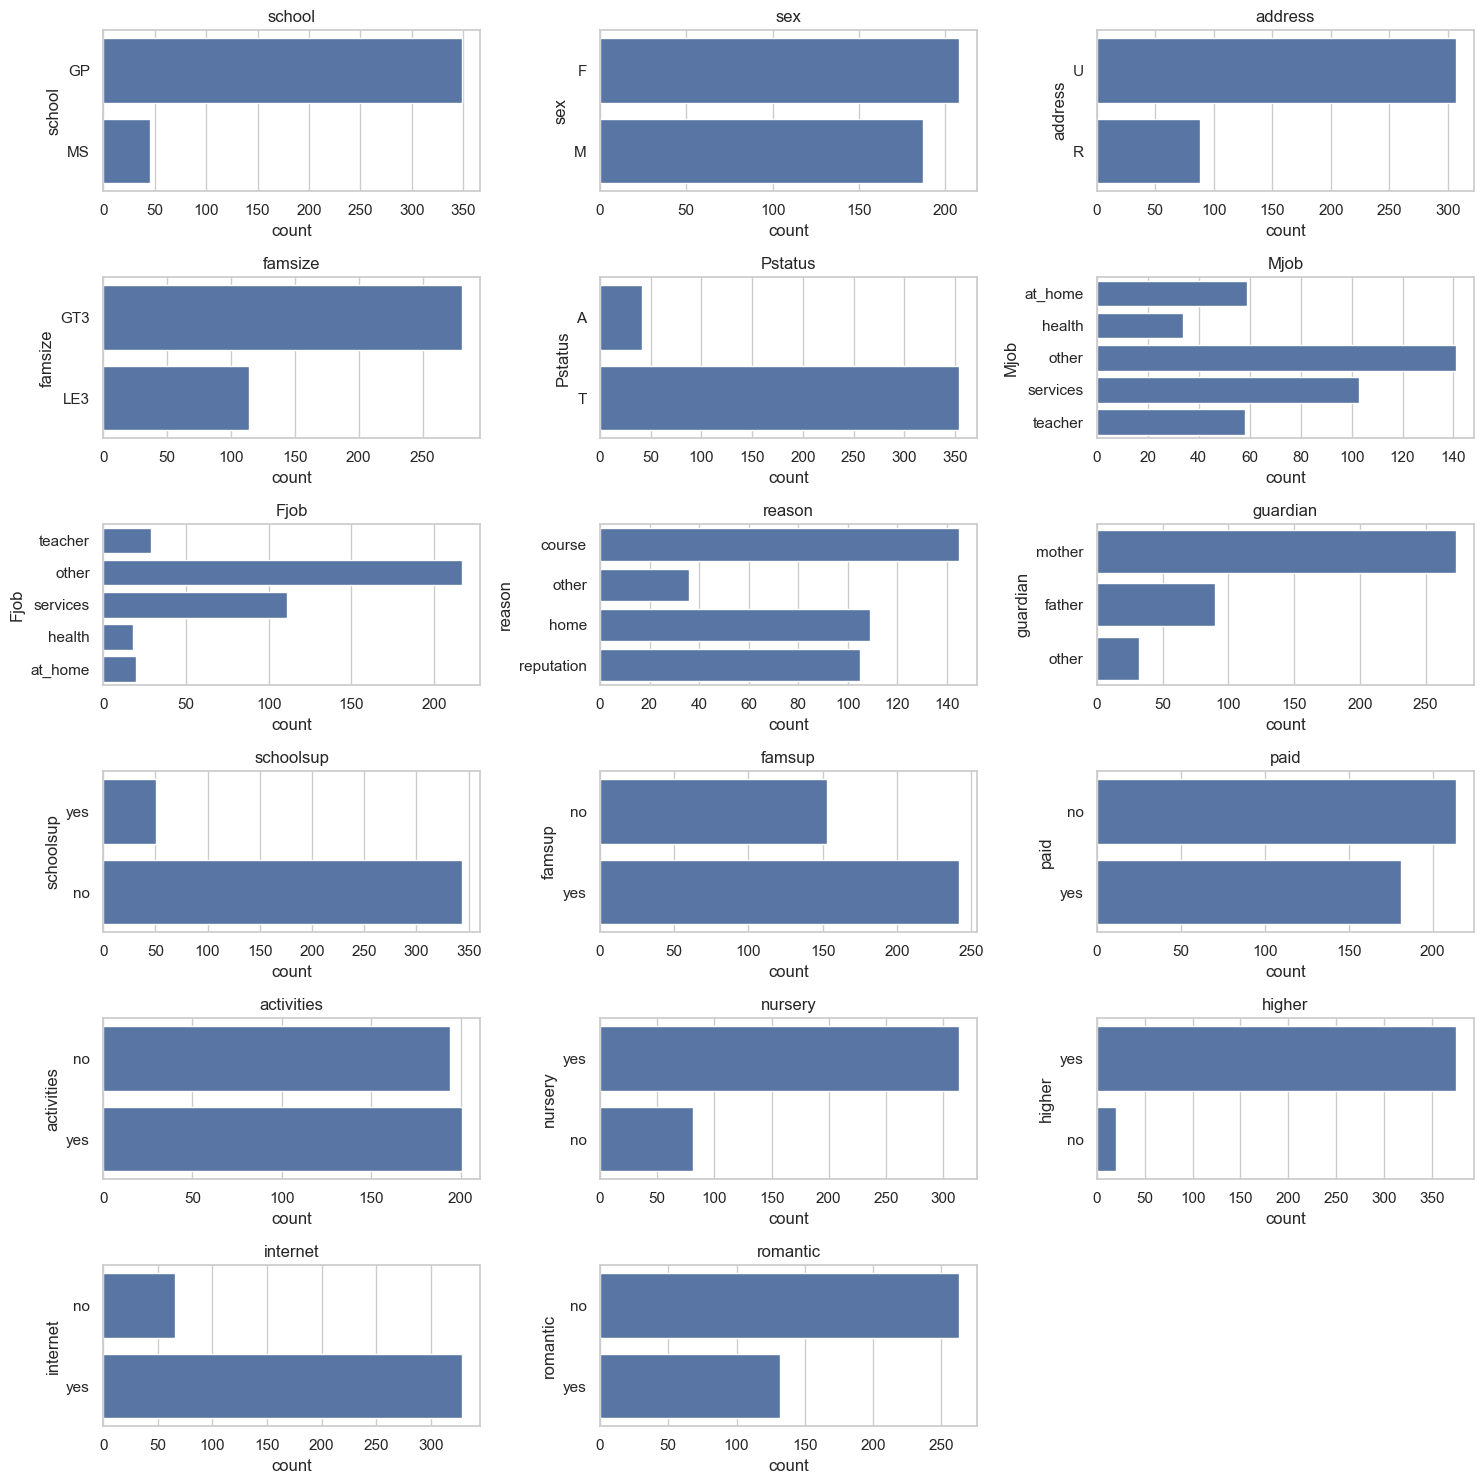

In [ ]:
# Selecting categorical columns for distribution plots
categorical_cols = data.select_dtypes(include=['object']).columns

# Plotting distributions of categorical features
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(y=data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

# Bivariate analysis with hue- using scatter,bar,box plots

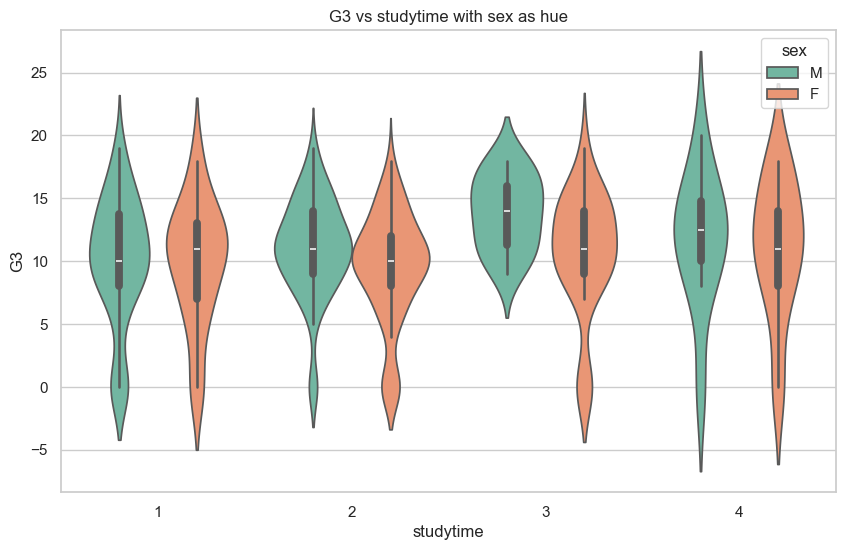

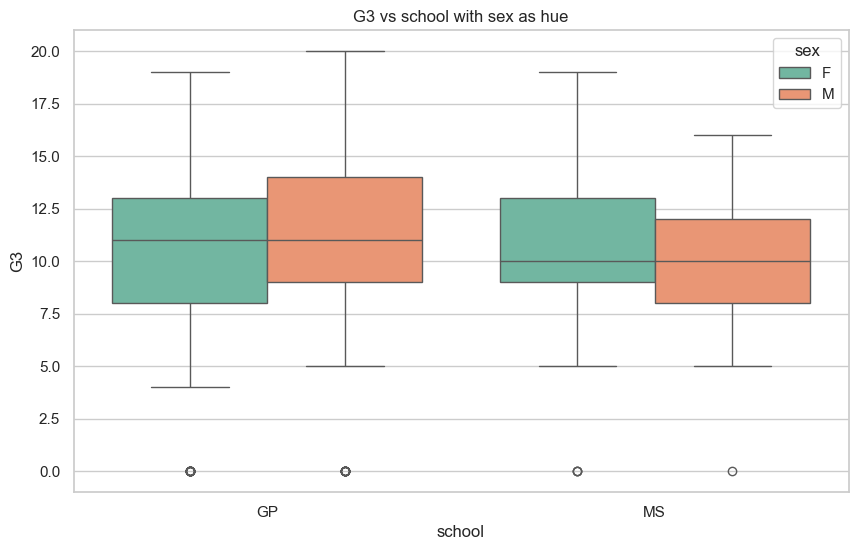

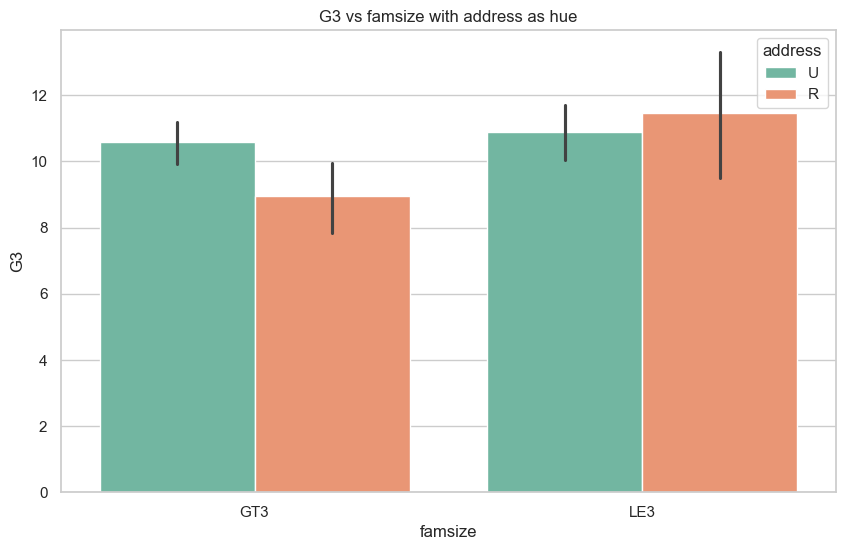

In [ ]:
def plot_bivariate_hue(data, x, y, hue, plot_type="scatter"):
    plt.figure(figsize=(10, 6))
    if plot_type == "scatter":
        sns.scatterplot(x=x, y=y, hue=hue, data=data, palette="Set2")
    elif plot_type == "bar":
        sns.barplot(x=x, y=y, hue=hue, data=data, palette="Set2")
    elif plot_type == "box":
        sns.boxplot(x=x, y=y, hue=hue, data=data, palette="Set2")
    elif plot_type == "violin":
        sns.violinplot(x=x, y=y, hue=hue, data=data, palette="Set2")
    plt.title(f'{y} vs {x} with {hue} as hue')
    plt.show()

# Scatter plot with hue (for numerical variables)
plot_bivariate_hue(data, 'studytime', 'G3', 'sex', plot_type="violin")

# Box plot with hue (for mixed variables)
plot_bivariate_hue(data, 'school', 'G3', 'sex', plot_type="box")

# Bar plot with hue (for categorical variables)
plot_bivariate_hue(data, 'famsize', 'G3', 'address', plot_type="bar")

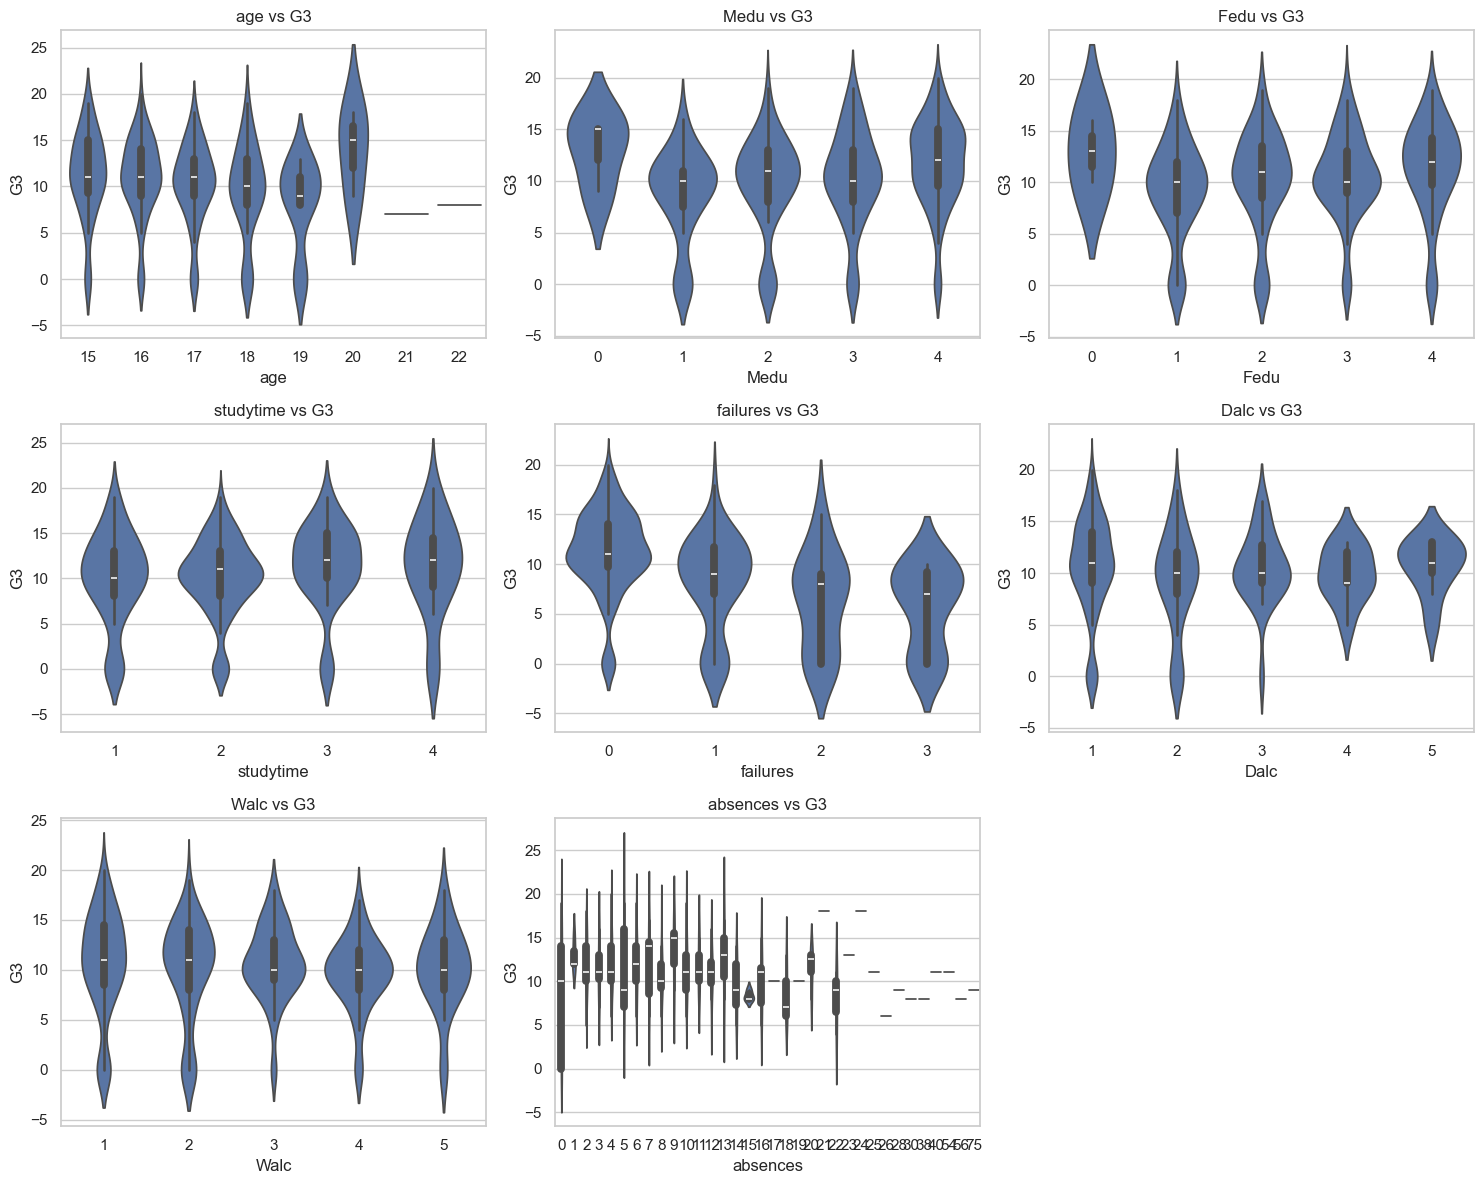

In [ ]:
# Bivariate Analysis - Numerical Features vs Final Grades (G3)

# Selecting some key numerical features for bivariate analysis
key_numerical_features = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'Dalc', 'Walc', 'absences']

plt.figure(figsize=(15, 12))
for i, col in enumerate(key_numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x=data[col], y=data['G3'])
    plt.title(f'{col} vs G3')
    plt.tight_layout()

plt.show()

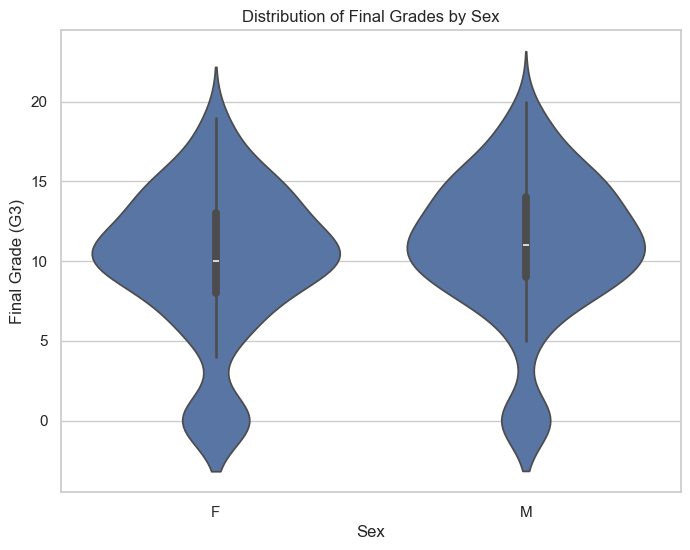

In [ ]:
# Violin plot for final grades by sex
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='G3', data=data)
plt.title('Distribution of Final Grades by Sex')
plt.xlabel('Sex')
plt.ylabel('Final Grade (G3)')
plt.show()

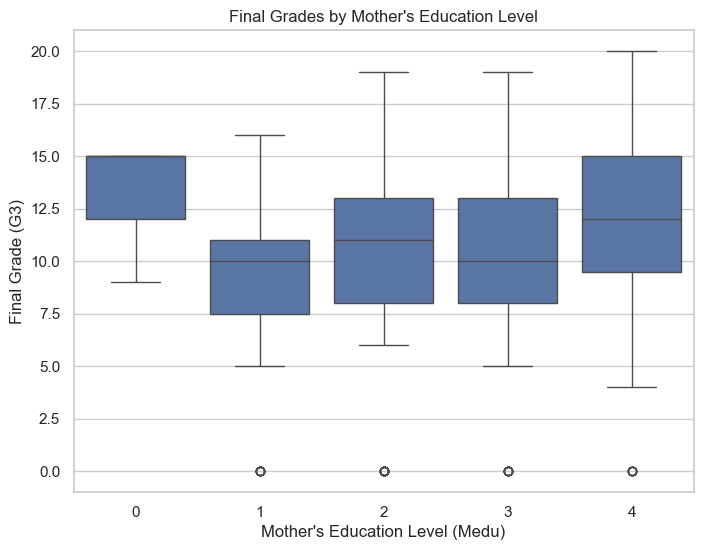

In [ ]:
# Box plot for final grades by mother's education level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Medu', y='G3', data=data)
plt.title('Final Grades by Mother\'s Education Level')
plt.xlabel('Mother\'s Education Level (Medu)')
plt.ylabel('Final Grade (G3)')
plt.show()

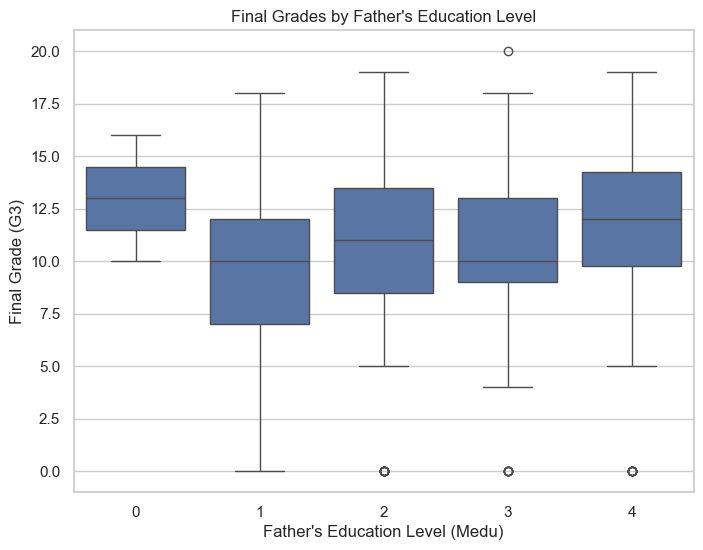

In [ ]:
# Box plot for final grades by father's education level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fedu', y='G3', data=data)
plt.title('Final Grades by Father\'s Education Level')
plt.xlabel('Father\'s Education Level (Medu)')
plt.ylabel('Final Grade (G3)')
plt.show()

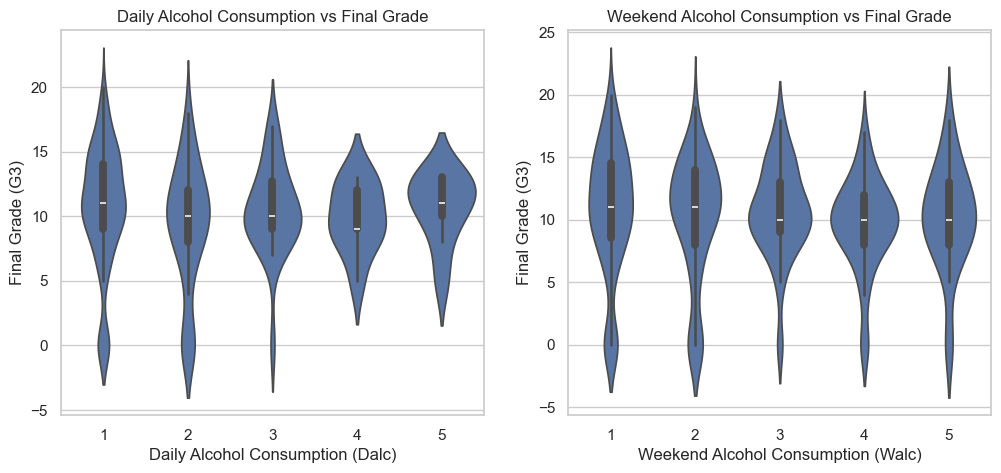

Correlation between Daily Alcohol Consumption and Final Grade:  -0.05466004056673598
Correlation between Weekend Alcohol Consumption and Final Grade:  -0.05193932374224616


In [ ]:
# Violin plot for Daily Alcohol Consumption vs Final Grade
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x='Dalc', y='G3', data=data)
plt.title('Daily Alcohol Consumption vs Final Grade')
plt.xlabel('Daily Alcohol Consumption (Dalc)')
plt.ylabel('Final Grade (G3)')

# Violin plot for Weekend Alcohol Consumption vs Final Grade
plt.subplot(1, 2, 2)
sns.violinplot(x='Walc', y='G3', data=data)
plt.title('Weekend Alcohol Consumption vs Final Grade')
plt.xlabel('Weekend Alcohol Consumption (Walc)')
plt.ylabel('Final Grade (G3)')

plt.show()

# Calculating correlations


correlation_dalc_g3 = data['Dalc'].corr(data['G3'])
correlation_walc_g3 = data['Walc'].corr(data['G3'])
print("Correlation between Daily Alcohol Consumption and Final Grade: ", correlation_dalc_g3)
print("Correlation between Weekend Alcohol Consumption and Final Grade: ", correlation_walc_g3)

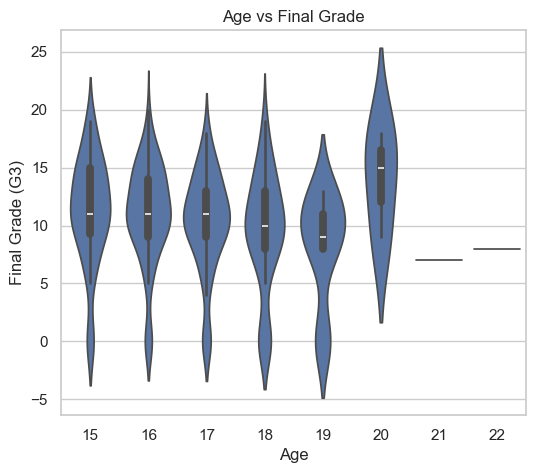

Correlation between Age and Final Grade:  -0.16157943813834053


In [ ]:
# Violin plot for Age vs Final Grade
plt.figure(figsize=(6, 5))
sns.violinplot(x='age', y='G3', data=data)
plt.title('Age vs Final Grade')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.show()

# Calculating correlation
correlation_age_g3 = data['age'].corr(data['G3'])
print("Correlation between Age and Final Grade: ", correlation_age_g3)

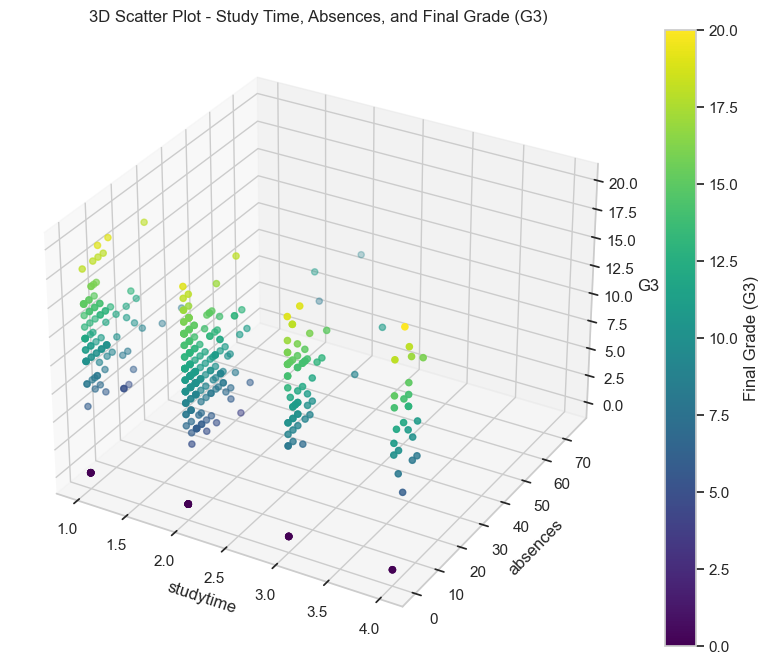

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Selecting variables for the 3D plot
x_3d, y_3d, z_3d = 'studytime', 'absences', 'G3'

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data[x_3d], data[y_3d], data[z_3d], c=data[z_3d], cmap='viridis')

# Labels and title
ax.set_xlabel(x_3d)
ax.set_ylabel(y_3d)
ax.set_zlabel(z_3d)
ax.set_title('3D Scatter Plot - Study Time, Absences, and Final Grade (G3)')

# Color bar indicating the values of G3
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Final Grade (G3)')


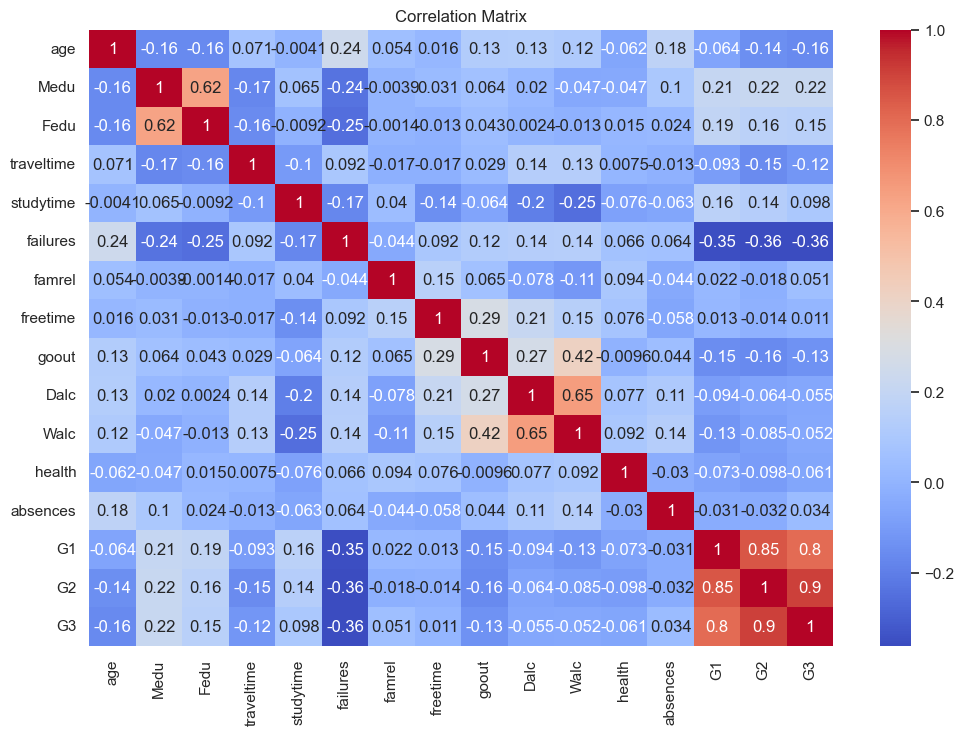

In [ ]:
# Correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\chali\AppData\Local\Temp\ipykernel_11920\3460570735.py:3: FutureWarning: The provided callable <function mean at 0x00000186D527EA20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  absence_grade = pd.pivot_table(data, values='G3', index='absences', aggfunc=np.mean)


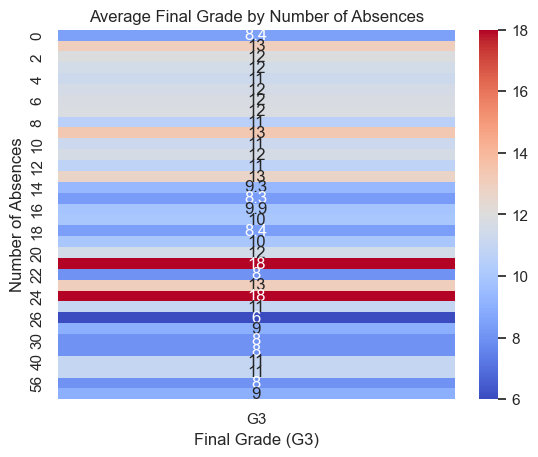

In [ ]:
import numpy as np
# Create a heatmap for absences and grades
absence_grade = pd.pivot_table(data, values='G3', index='absences', aggfunc=np.mean)
sns.heatmap(absence_grade, annot=True, cmap='coolwarm')
plt.title('Average Final Grade by Number of Absences')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Absences')
plt.show()

<Axes: >

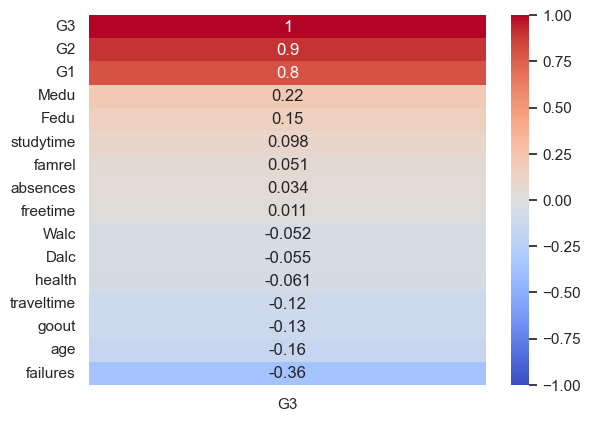

In [ ]:
corr = data.corr(numeric_only=True)

# Create a heatmap for only the G3 correlations
sns.heatmap(corr[['G3']].sort_values(by='G3', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')